In [1]:
# plotting libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from pathlib import Path

# auxiliary functions
import s3ts.analysis as aux

In [2]:
df = aux.load_data(Path("../results_synced/wdw/"))
df

,dataset,arch,repr,pretrain,fold_number,random_state,batch_size,stride_series,window_length,window_time_stride,...,target_test_acc,target_val_f1,target_test_f1,target_val_auroc,target_test_auroc,pre_val_mse,pre_val_r2,pre_best_model,pre_train_csv,pre_nepochs
0,ArrowHead,CNN,DF,False,1,0,128,True,5,1,...,0.331518,0.370055,0.331518,0.545356,0.531843,NaN,NaN,NaN,NaN,NaN
1,ArrowHead,CNN,DF,True,1,0,128,True,5,1,...,0.367179,0.373946,0.367179,0.549393,0.561070,0.812121,0.352160,training/2023-03-30_02-33_EXP_wdw_DF_CNN_Arrow...,training/2023-03-30_02-33_EXP_wdw_DF_CNN_Arrow...,57.0
2,ArrowHead,CNN,DF,False,1,0,128,True,10,1,...,0.374472,0.379335,0.374472,0.552672,0.552203,NaN,NaN,NaN,NaN,NaN
3,ArrowHead,CNN,DF,True,1,0,128,True,10,1,...,0.298144,0.349088,0.298144,0.517680,0.503249,0.923662,0.161903,training/2023-03-30_02-33_EXP_wdw_DF_CNN_Arrow...,training/2023-03-30_02-33_EXP_wdw_DF_CNN_Arrow...,50.0
4,GunPoint,CNN,DF,False,1,0,128,True,5,1,...,0.582252,0.549912,0.582252,0.535087,0.602137,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,Chinatown,CNN,DF,True,2,0,128,False,5,5,...,0.660020,0.718431,0.660020,0.770740,0.703549,0.779550,0.098184,training/2023-03-29_18-30_EXP_wdw_DF_CNN_China...,training/2023-03-29_18-30_EXP_wdw_DF_CNN_China...,57.0
347,Chinatown,CNN,DF,False,2,0,128,True,5,1,...,0.753992,0.755193,0.753992,0.794141,0.754887,NaN,NaN,NaN,NaN,NaN
348,Chinatown,CNN,DF,True,2,0,128,True,5,1,...,0.724177,0.768228,0.724177,0.793020,0.756052,0.723182,0.225028,training/2023-03-29_18-30_EXP_wdw_DF_CNN_China...,training/2023-03-29_18-30_EXP_wdw_DF_CNN_China...,59.0
349,Chinatown,CNN,DF,False,2,0,128,False,5,1,...,0.710492,0.757638,0.710492,0.800783,0.732157,NaN,NaN,NaN,NaN,NaN


In [3]:
cols = ['tgt_nepochs', 'pre_nepochs', 'target_val_acc', 'target_test_acc', 'target_test_auroc']
df.columns

Index(['dataset', 'arch', 'repr', 'pretrain', 'fold_number', 'random_state',
       'batch_size', 'stride_series', 'window_length', 'window_time_stride',
       'window_patt_stride', 'train_events_per_class',
       'train_event_multiplier', 'nevents_train', 'pret_event_multiplier',
       'nevents_pret', 'test_event_multiplier', 'nevents_test',
       'tgt_best_model', 'tgt_train_csv', 'tgt_nepochs', 'target_val_acc',
       'target_test_acc', 'target_val_f1', 'target_test_f1',
       'target_val_auroc', 'target_test_auroc', 'pre_val_mse', 'pre_val_r2',
       'pre_best_model', 'pre_train_csv', 'pre_nepochs'],
      dtype='object')

In [12]:
df.groupby(["dataset", "arch", 	"window_length", "pretrain", 'window_time_stride', "stride_series", 'window_patt_stride'])[cols].mean()

tgt_nepochs  \
dataset   arch window_length pretrain window_time_stride stride_series window_patt_stride                
ArrowHead CNN  5             False    1                  True          1                          90.8   
                             True     1                  True          1                          54.6   
               10            False    1                  True          1                          51.2   
                             True     1                  True          1                          72.5   
CBF       CNN  5             False    1                  True          1                          70.6   
...                                                                                                ...   
GunPoint  CNN  5             True     5                  True          1                          88.2   
               10            False    1                  True          1                         107.0   
                             True     1                  True          1                          54.2   
               15            False    1                  True          1                          90.0   
                             True     1                  True          1                          67.0   

                                                                                           pre_nepochs  \
dataset   arch window_length pretrain window_time_stride stride_series window_patt_stride                
ArrowHead CNN  5             False    1                  True          1                           NaN   
                             True     1                  True          1                          54.8   
               10            False    1                  True          1                           NaN   
                             True     1                  True          1                          54.0   
CBF       CNN  5             False    1                  True          1                           NaN   
...                                                                                                ...   
GunPoint  CNN  5             True     5                  True          1                          46.0   
               10            False    1                  True          1                           NaN   
                             True     1                  True          1                          58.6   
               15            False    1                  True          1                           NaN   
                             True     1                  True          1                          53.0   

                                                                                           target_val_acc  \
dataset   arch window_length pretrain window_time_stride stride_series window_patt_stride                   
ArrowHead CNN  5             False    1                  True          1                         0.388182   
                             True     1                  True          1                         0.383648   
               10            False    1                  True          1                         0.370365   
                             True     1                  True          1                         0.372980   
CBF       CNN  5             False    1                  True          1                         0.462560   
...                                                                                                   ...   
GunPoint  CNN  5             True     5                  True          1                         0.590071   
               10            False    1                  True          1                         0.547809   
                             True     1                  True          1                         0.572947   
               15            False    1                  True          1                         0.562848   
                         

In [5]:
df[df["window_time_stride"] == 1][df["window_patt_stride"] == 1].groupby(["dataset", "arch","window_length", "pretrain", 'window_time_stride','window_patt_stride'])[cols].mean()

tgt_nepochs  \
dataset   arch window_length pretrain window_time_stride window_patt_stride                
ArrowHead CNN  5             False    1                  1                          90.8   
                             True     1                  1                          54.6   
               10            False    1                  1                          51.2   
                             True     1                  1                          72.5   
CBF       CNN  5             False    1                  1                          70.6   
                             True     1                  1                          24.2   
               10            False    1                  1                          70.4   
                             True     1                  1                          37.4   
               15            False    1                  1                          54.2   
                             True     1                  1                          25.4   
Chinatown CNN  5             False    1                  1                          77.6   
                             True     1                  1                          79.8   
               10            False    1                  1                         109.0   
                             True     1                  1                          72.0   
               15            False    1                  1                         104.4   
                             True     1                  1                          88.6   
GunPoint  CNN  5             False    1                  1                          86.8   
                             True     1                  1                          73.4   
               10            False    1                  1                         107.0   
                             True     1                  1                          54.2   
               15            False    1                  1                          90.0   
                             True     1                  1                          67.0   

                                                                             pre_nepochs  \
dataset   arch window_length pretrain window_time_stride window_patt_stride                
ArrowHead CNN  5             False    1                  1                           NaN   
                             True     1                  1                          54.8   
               10            False    1                  1                           NaN   
                             True     1                  1                          54.0   
CBF       CNN  5             False    1                  1                           NaN   
                             True     1                  1                          57.8   
               10            False    1                  1                           NaN   
                             True     1                  1                          58.6   
               15            False    1                  1                           NaN   
                             True     1                  1                          58.2   
Chinatown CNN  5             False    1                  1                           NaN   
                             True     1                  1                          57.8   
               10            False    1                  1                           NaN   
                             True     1                  1                          58.4   
               15            False    1                  1                           NaN   
                             True     1                  1                          57.6   
GunPoint  CNN  5             False    1                  1                           NaN   
                             True     1                  1                          58.2   
               10           

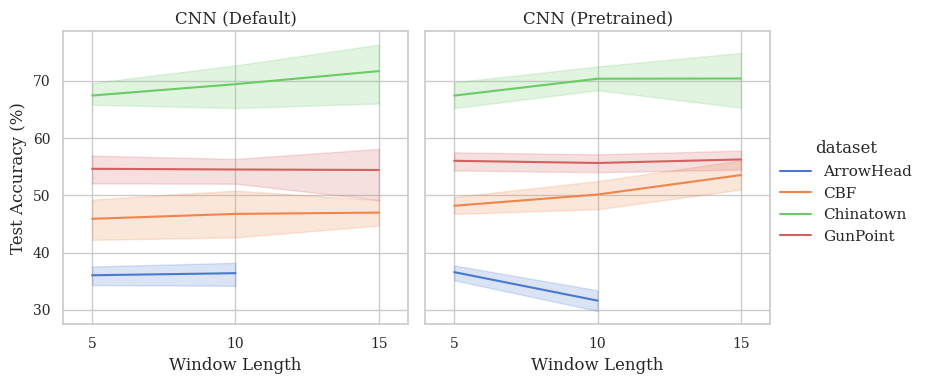

In [6]:
data = df[df["window_time_stride"] == 1][df["window_patt_stride"] == 1].copy()
data['target_test_acc'] = 100*data["target_test_acc"]
#data['pret_event_multiplier'] = data['pret_event_multiplier'].astype("category")
data["xd"] = data["pretrain"].replace({True: "(Pretrained)", False: "(Default)"})
data["arch"] = data["arch"].str.replace("_DFS", " ")
data["col"] = data["arch"] + " " + data["xd"]
data.sort_values(["dataset"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
# g = sns.catplot(data=data, x='train_events_per_class', y="target_test_acc", hue='pret_event_multiplier', col="dataset", #row="arch",# hue="pretrained",
#                 kind="bar",  height=4, aspect=1, margin_titles=True, legend=False, legend_out=False, palette="muted", #["blue", "green", "orange", "red"],
#                 errorbar="sd", col_wrap=3, sharex=False, sharey=True, facet_kws={"despine": False, "ylim": (15, 75),
#                 "gridspec_kws": {}});
g = sns.relplot(data=data, x='window_length', y="target_test_acc", hue='dataset', col="col", kind="line", 
                height=4, aspect=1, legend=True, palette="muted", col_wrap=2, markers="True", facet_kws={"despine": False})
for ax in g.axes.flat:
    ax.set_xticks([5, 10, 15])
    ax.set_xlim(4,16)

g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Window Length");

In [7]:
df[df["window_length"] == 5][df["window_patt_stride"] == 1].groupby(["dataset", "arch","window_length", "pretrain", 'window_time_stride','window_patt_stride', "stride_series"])[cols].mean()


tgt_nepochs  \
dataset   arch window_length pretrain window_time_stride window_patt_stride stride_series                
ArrowHead CNN  5             False    1                  1                  True                  90.8   
                             True     1                  1                  True                  54.6   
CBF       CNN  5             False    1                  1                  True                  70.6   
                                      2                  1                  True                  80.6   
                                      3                  1                  True                  69.8   
                                      4                  1                  True                  65.2   
                                      5                  1                  True                  89.4   
                             True     1                  1                  True                  24.2   
                                      2                  1                  False                 29.2   
                                                                            True                  52.0   
                                      3                  1                  False                 23.0   
                                                                            True                  27.6   
                                      4                  1                  False                 60.0   
                                                                            True                  19.6   
                                      5                  1                  False                 49.0   
                                                                            True                  13.0   
Chinatown CNN  5             False    1                  1                  True                  77.6   
                                      2                  1                  True                  75.8   
                                      3                  1                  True                 102.4   
                                      4                  1                  True                  65.6   
                                      5                  1                  True                  73.6   
                             True     1                  1                  True                  79.8   
                                      2                  1                  False                 88.2   
                                                                            True                 101.0   
                                      3                  1                  False                 94.8   
                                                                            True                  93.8   
                                      4                  1                  False                 79.4   
                                                                            True                  77.0   
                                      5                  1                  False                 70.0   
                                                                            True                  72.8   
GunPoint  CNN  5             False    1                  1                  True                  86.8   
                                      2                  1                  True                  80.8   
                                      3                  1                  True                 111.2   
                                      4                  1                  True                 101.4   
                                      5                  1                  True                 103.2   
                             True     1                  1                  True                  73.4   
                                      2                  1     

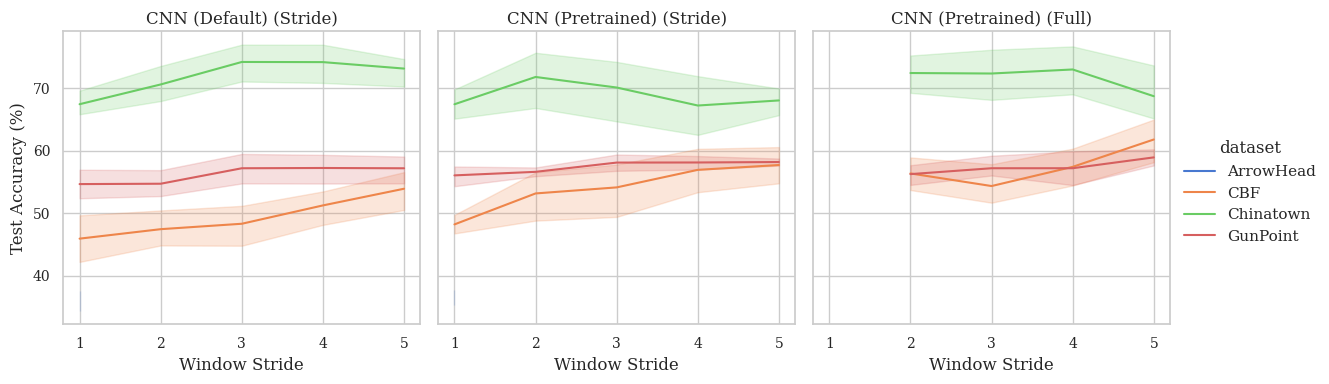

In [8]:
data = df[df["window_length"] == 5][df["window_patt_stride"] == 1].copy()
data['target_test_acc'] = 100*data["target_test_acc"]
#data['pret_event_multiplier'] = data['pret_event_multiplier'].astype("category")
data["xd"] = data["pretrain"].replace({True: "(Pretrained)", False: "(Default)"}) + " " + data["stride_series"].replace({True: "(Stride)", False: "(Full)"})
data["arch"] = data["arch"].str.replace("_DFS", " ")
data["col"] = data["arch"] + " " + data["xd"]
data.sort_values(["dataset"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

g = sns.relplot(data=data, x='window_time_stride', y="target_test_acc", hue='dataset', col="col", kind="line", 
                height=4, aspect=1, legend=True, palette="muted", col_wrap=3, markers="True", facet_kws={"despine": False})

g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Window Stride");

In [9]:
df[df["window_length"] == 5][df["window_time_stride"] == 1].groupby(["dataset", "arch","window_length", "pretrain", 'window_time_stride','window_patt_stride'])[cols].mean()

tgt_nepochs  \
dataset   arch window_length pretrain window_time_stride window_patt_stride                
ArrowHead CNN  5             False    1                  1                          90.8   
                             True     1                  1                          54.6   
CBF       CNN  5             False    1                  1                          70.6   
                                                         2                          30.5   
                             True     1                  1                          24.2   
                                                         2                          21.0   
Chinatown CNN  5             False    1                  1                          77.6   
                                                         2                          70.6   
                                                         3                          76.2   
                             True     1                  1                          79.8   
                                                         2                          91.8   
                                                         3                          62.6   
GunPoint  CNN  5             False    1                  1                          86.8   
                                                         2                          91.8   
                                                         3                          77.0   
                                                         4                          68.8   
                                                         5                          60.8   
                             True     1                  1                          73.4   
                                                         2                          96.0   
                                                         3                          77.4   
                                                         4                          70.4   
                                                         5                          92.8   

                                                                             pre_nepochs  \
dataset   arch window_length pretrain window_time_stride window_patt_stride                
ArrowHead CNN  5             False    1                  1                           NaN   
                             True     1                  1                          54.8   
CBF       CNN  5             False    1                  1                           NaN   
                                                         2                           NaN   
                             True     1                  1                          57.8   
                                                         2                          58.5   
Chinatown CNN  5             False    1                  1                           NaN   
                                                         2                           NaN   
                                                         3                           NaN   
                             True     1                  1                          57.8   
                                                         2                          58.6   
                                                         3                          59.0   
GunPoint  CNN  5             False    1                  1                           NaN   
                                                         2                           NaN   
                                                         3                           NaN   
                                                         4                           NaN   
                                                         5                           NaN   
                             True     1                  1                          58.2   
                            

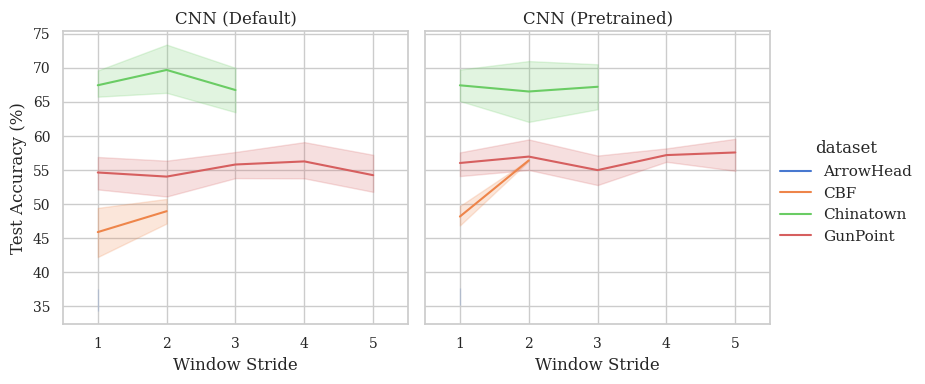

In [10]:
data = df[df["window_length"] == 5][df["window_time_stride"] == 1].copy()
data['target_test_acc'] = 100*data["target_test_acc"]
#data['pret_event_multiplier'] = data['pret_event_multiplier'].astype("category")
data["xd"] = data["pretrain"].replace({True: "(Pretrained)", False: "(Default)"})
data["arch"] = data["arch"].str.replace("_DFS", " ")
data["col"] = data["arch"] + " " + data["xd"]
data.sort_values(["dataset"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

g = sns.relplot(data=data, x='window_patt_stride', y="target_test_acc", hue='dataset', col="col", kind="line", 
                height=4, aspect=1, legend=True, palette="muted", col_wrap=2, markers="True", facet_kws={"despine": False})

for ax in g.axes.flat:
    ax.set_xticks([1, 2, 3, 4, 5])
    ax.set_xlim(0.5,5.5)

g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Window Stride");